In [1]:
# tylko nowe cechy
# liczba nowych cech to połowa oryginalnych cech
# sqrt(n) zaokrąglony w góre
# klasyfikatory - zafiksowac sensowne ustawienia
# wagi sumowane do 1
# lecim po wszystkich zbiorach czemu nie
# k-fold cross validation
from multi_imbalance.datasets import load_datasets
import experiment_simpler_arch2 as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
datasets = load_datasets()

In [3]:
for k in datasets:
    print(k)
    print(datasets[k]['data'][:3,:])
    print([np.unique(datasets[k]['data'][:,i]).size for i in range(datasets[k]['data'].shape[1])], datasets[k]['data'].shape[0])

1czysty-cut
[[211.53336007 208.76702627]
 [189.53670249  77.4191745 ]
 [181.78462832 148.69785931]]
[1200, 1200] 1200
2delikatne-cut
[[-15.82525427 -14.73927865]
 [280.3667336  -14.10018775]
 [ 85.10847553 -51.58454252]]
[1200, 1200] 1200
3mocniej-cut
[[ 206.61279752 -101.92831295]
 [ 252.63037866  294.08535685]
 [  31.33210152  254.16272716]]
[1200, 1200] 1200
4delikatne-bezover-cut
[[191.84693455 -31.18285044]
 [236.34631621 264.84234467]
 [ 86.67644876  24.25356988]]
[1200, 1200] 1200
balance-scale
[[1. 1. 1. 1.]
 [1. 1. 1. 2.]
 [1. 1. 1. 3.]]
[5, 5, 5, 5] 625
cleveland
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    7. ]]
[41, 2, 4, 50, 152, 2, 3, 91, 2, 40, 3, 6, 5] 303
cleveland_v2
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  28

### One hot encoding for columns with less than 10 unique values

In [4]:
for k in datasets:
    df = pd.DataFrame(data=datasets[k]['data'])
    cutoff = 10

    encoded = pd.get_dummies(df, columns=df.columns[df.apply(pd.Series.nunique) < cutoff], drop_first=True)
    result_df = pd.concat([df, encoded], axis=1)
    datasets[k]['data'] = result_df.values

In [5]:
for k in datasets:
    print(k)
    print(datasets[k]['data'][:3,:])
    print([np.unique(datasets[k]['data'][:,i]).size for i in range(datasets[k]['data'].shape[1])], datasets[k]['data'].shape[0])

1czysty-cut
[[211.53336007 208.76702627 211.53336007 208.76702627]
 [189.53670249  77.4191745  189.53670249  77.4191745 ]
 [181.78462832 148.69785931 181.78462832 148.69785931]]
[1200, 1200, 1200, 1200] 1200
2delikatne-cut
[[-15.82525427 -14.73927865 -15.82525427 -14.73927865]
 [280.3667336  -14.10018775 280.3667336  -14.10018775]
 [ 85.10847553 -51.58454252  85.10847553 -51.58454252]]
[1200, 1200, 1200, 1200] 1200
3mocniej-cut
[[ 206.61279752 -101.92831295  206.61279752 -101.92831295]
 [ 252.63037866  294.08535685  252.63037866  294.08535685]
 [  31.33210152  254.16272716   31.33210152  254.16272716]]
[1200, 1200, 1200, 1200] 1200
4delikatne-bezover-cut
[[191.84693455 -31.18285044 191.84693455 -31.18285044]
 [236.34631621 264.84234467 236.34631621 264.84234467]
 [ 86.67644876  24.25356988  86.67644876  24.25356988]]
[1200, 1200, 1200, 1200] 1200
balance-scale
[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 

In [6]:
config = ex.config_calculation_strategy2(datasets)

In [7]:
# config['cleveland'] = {
# 'nn_config': {
#     'units_1st_layer': 13,
#     'units_2nd_layer': 64,
#     'units_3rd_layer': 32,
#     'units_latent_layer': 6
# },
# "weighted_triplet_loss": True,
# "lr": 1e-4,
# "batch_size": 16,
# "gamma": 0.95,
# "epochs": 100
# }

# config['2delikatne-cut'] = {
# 'nn_config': {
#     'units_1st_layer': 2,
#     'units_2nd_layer': 8,
#     'units_3rd_layer': 4,
#     'units_latent_layer': 2
# },
# 'weighted_triplet_loss': True,
# 'lr': 1e-4,
# 'batch_size': 16,
# 'gamma': 0.95,
# 'epochs': 100
# }

# config['3mocniej-cut'] = {
# 'nn_config': {
#     'units_1st_layer': 2,
#     'units_2nd_layer': 8,
#     'units_3rd_layer': 4,
#     'units_latent_layer': 2
# },
# 'weighted_triplet_loss': True,
# 'lr': 1e-4,
# 'batch_size': 16,
# 'gamma': 0.95,
# 'epochs': 100
# }

# config['cmc'] = {'nn_config': {'units_1st_layer': 9,
#    'units_2nd_layer': 16,
#    'units_3rd_layer': 8,
#    'units_latent_layer': 4},
#   'weighted_triplet_loss': True,
#   'lr': 1e-4,
#   'batch_size': 32,
#   'gamma': 0.95,
#   'epochs': 100
# }

# config['dermatology'] = {'nn_config': {'units_1st_layer': 34,
#    'units_2nd_layer': 64,
#    'units_3rd_layer': 32,
#    'units_latent_layer': 8},
#   'weighted_triplet_loss': True,
#   'lr': 1e-4,
#   'batch_size': 32,
#   'gamma': 0.95,
#   'epochs': 100}

In [8]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 4, 'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 4,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 4, 'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 4,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 'balance-scale': {'nn_config': {'units_1st_layer': 20,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 'cleveland': {'nn_config': {'units_1st_layer': 37, 'unit

In [9]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced')
        } 
    return classifiers

1czysty-cut


100%|██████████| 240/240 [00:00<00:00, 4616.16it/s]


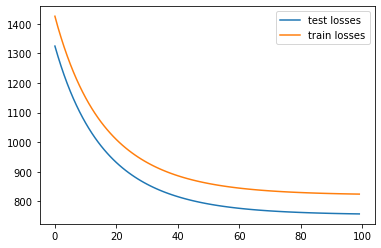

100%|██████████| 240/240 [00:00<00:00, 4816.93it/s]


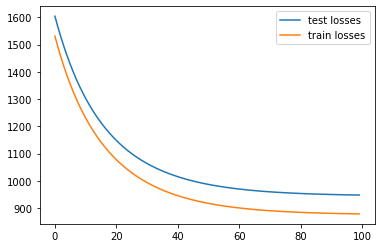

100%|██████████| 240/240 [00:00<00:00, 4666.84it/s]


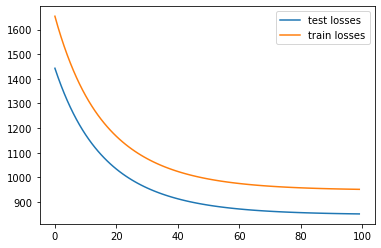

100%|██████████| 240/240 [00:00<00:00, 4567.69it/s]


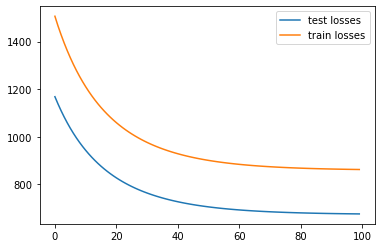

100%|██████████| 240/240 [00:00<00:00, 4723.49it/s]


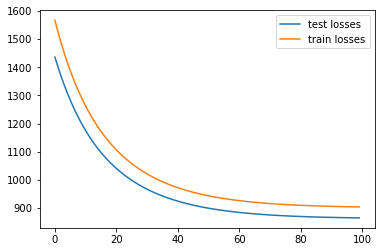

2delikatne-cut


100%|██████████| 240/240 [00:00<00:00, 4404.68it/s]


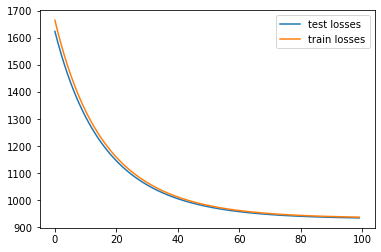

100%|██████████| 240/240 [00:00<00:00, 4719.04it/s]


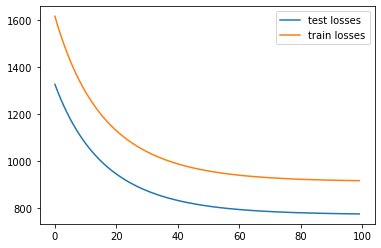

100%|██████████| 240/240 [00:00<00:00, 4886.05it/s]


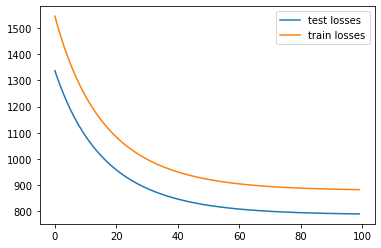

100%|██████████| 240/240 [00:00<00:00, 4662.78it/s]


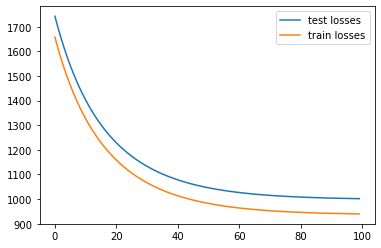

100%|██████████| 240/240 [00:00<00:00, 4828.97it/s]


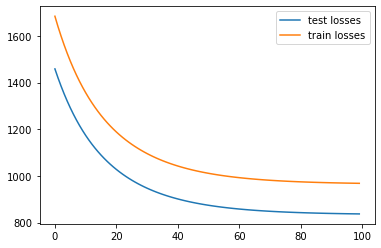

3mocniej-cut


100%|██████████| 240/240 [00:00<00:00, 5078.34it/s]


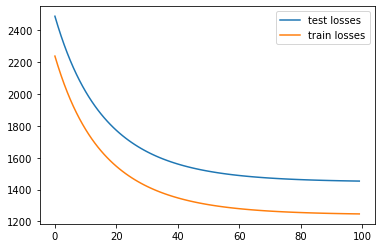

100%|██████████| 240/240 [00:00<00:00, 4486.39it/s]


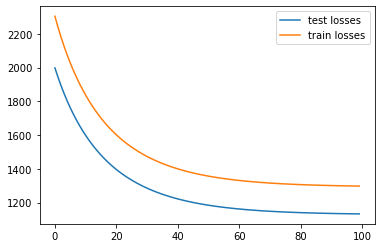

100%|██████████| 240/240 [00:00<00:00, 5115.08it/s]


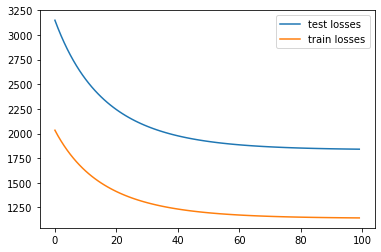

100%|██████████| 240/240 [00:00<00:00, 5362.36it/s]


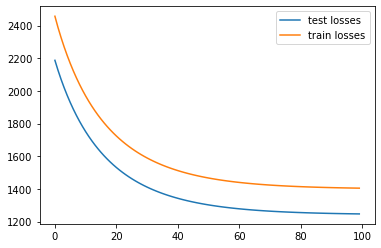

100%|██████████| 240/240 [00:00<00:00, 4538.35it/s]


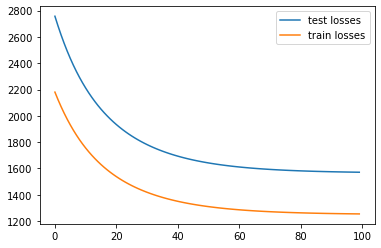

4delikatne-bezover-cut


100%|██████████| 240/240 [00:00<00:00, 4729.33it/s]


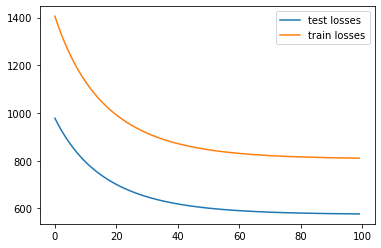

100%|██████████| 240/240 [00:00<00:00, 4830.66it/s]


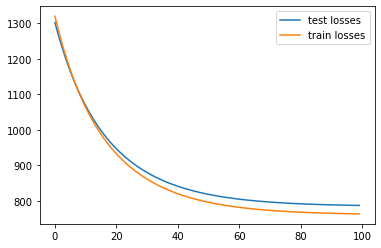

100%|██████████| 240/240 [00:00<00:00, 4799.82it/s]


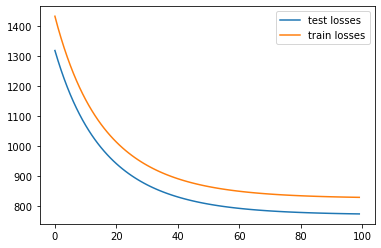

100%|██████████| 240/240 [00:00<00:00, 5326.35it/s]


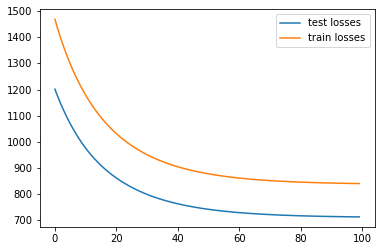

100%|██████████| 240/240 [00:00<00:00, 5227.71it/s]


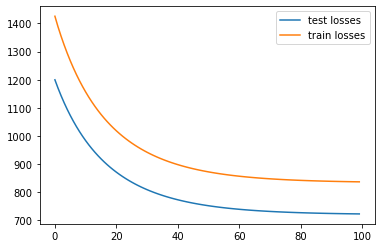

balance-scale


100%|██████████| 125/125 [00:00<00:00, 5216.02it/s]


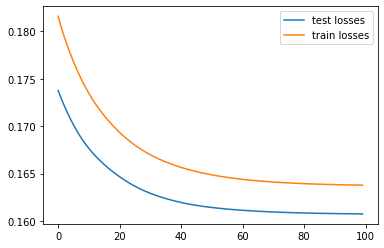

100%|██████████| 125/125 [00:00<00:00, 3959.88it/s]


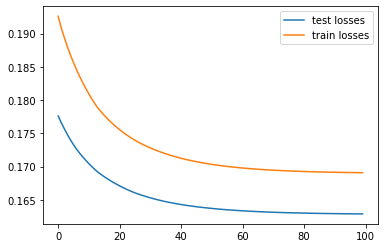

100%|██████████| 125/125 [00:00<00:00, 5267.11it/s]


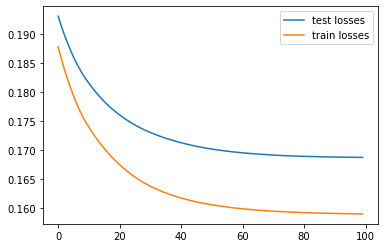

100%|██████████| 125/125 [00:00<00:00, 5334.53it/s]


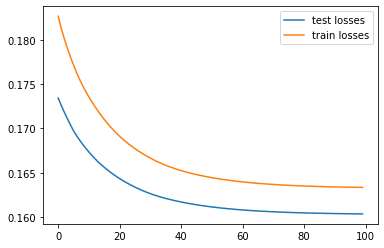

100%|██████████| 125/125 [00:00<00:00, 5285.96it/s]


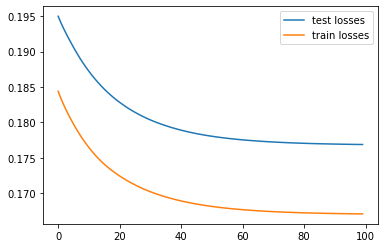

cleveland


100%|██████████| 61/61 [00:00<00:00, 4905.71it/s]


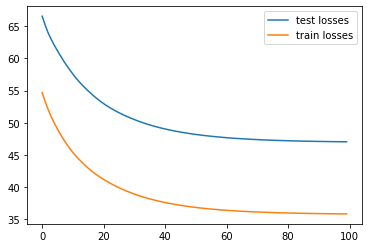

100%|██████████| 61/61 [00:00<00:00, 5070.40it/s]


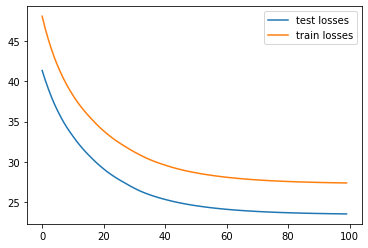

100%|██████████| 61/61 [00:00<00:00, 5107.55it/s]


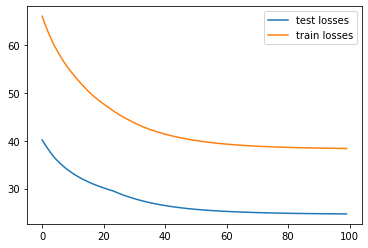

100%|██████████| 60/60 [00:00<00:00, 4982.94it/s]


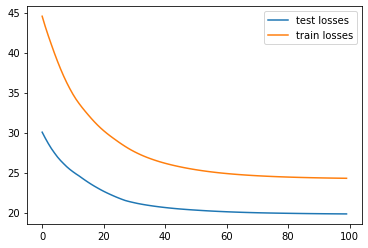

100%|██████████| 60/60 [00:00<00:00, 4956.15it/s]


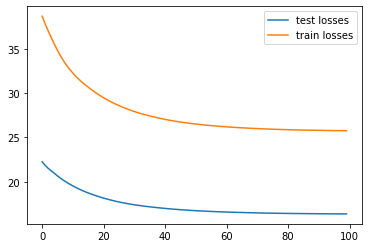

cleveland_v2


100%|██████████| 61/61 [00:00<00:00, 4766.52it/s]


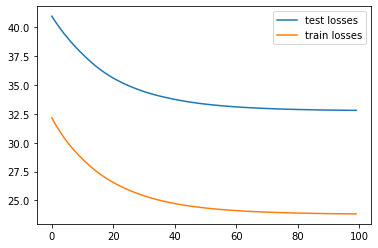

100%|██████████| 61/61 [00:00<00:00, 4167.59it/s]


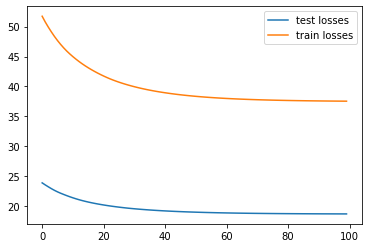

100%|██████████| 61/61 [00:00<00:00, 4591.92it/s]


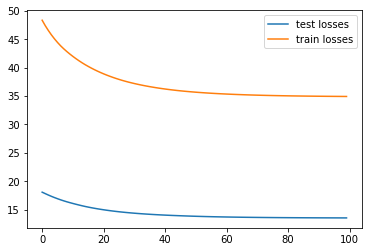

100%|██████████| 60/60 [00:00<00:00, 4629.30it/s]


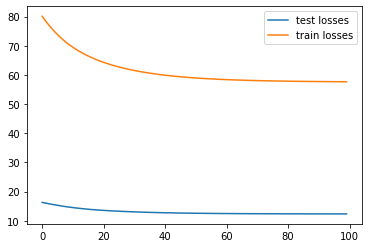

100%|██████████| 60/60 [00:00<00:00, 4530.63it/s]


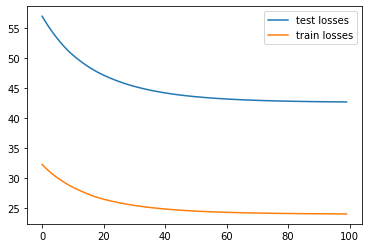

cmc


100%|██████████| 295/295 [00:00<00:00, 5436.14it/s]


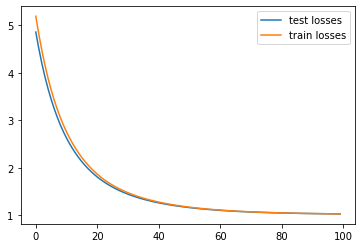

100%|██████████| 295/295 [00:00<00:00, 4955.48it/s]


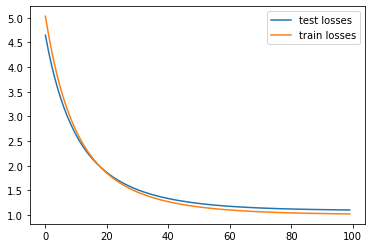

100%|██████████| 295/295 [00:00<00:00, 4839.31it/s]


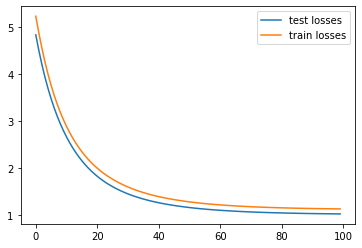

100%|██████████| 294/294 [00:00<00:00, 5404.13it/s]


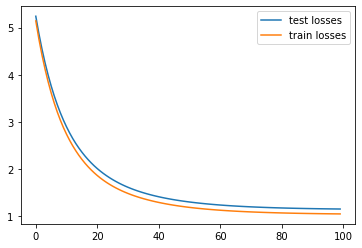

100%|██████████| 294/294 [00:00<00:00, 4476.99it/s]


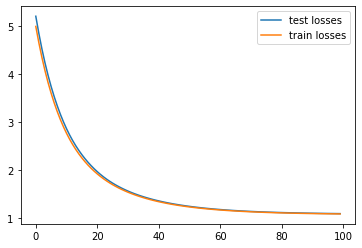

dermatology


100%|██████████| 74/74 [00:00<00:00, 5198.80it/s]


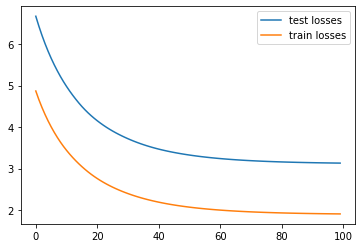

100%|██████████| 73/73 [00:00<00:00, 4710.60it/s]


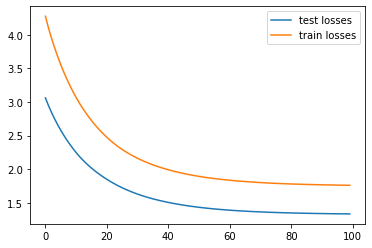

100%|██████████| 73/73 [00:00<00:00, 4300.70it/s]


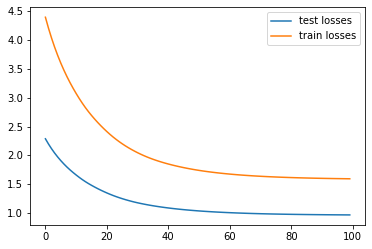

100%|██████████| 73/73 [00:00<00:00, 5127.77it/s]


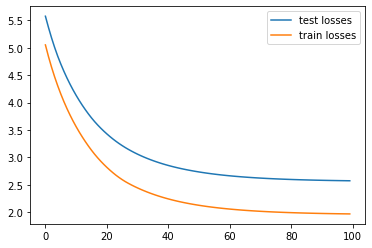

100%|██████████| 73/73 [00:00<00:00, 5267.50it/s]


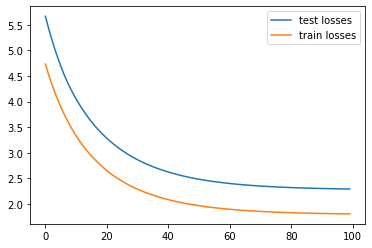

glass


100%|██████████| 43/43 [00:00<00:00, 4909.49it/s]


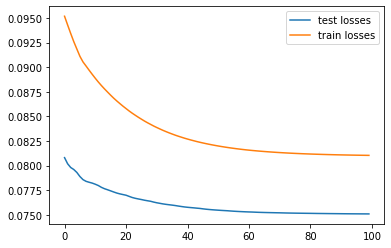

100%|██████████| 43/43 [00:00<00:00, 4574.64it/s]


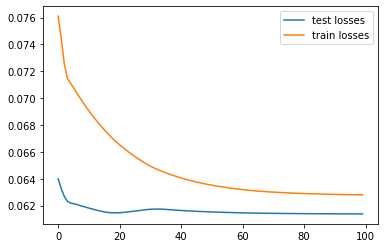

100%|██████████| 43/43 [00:00<00:00, 4928.27it/s]


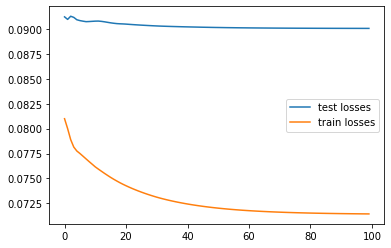

100%|██████████| 43/43 [00:00<00:00, 4420.25it/s]


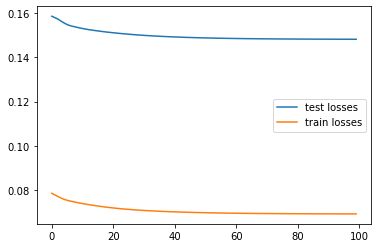

100%|██████████| 42/42 [00:00<00:00, 5067.92it/s]


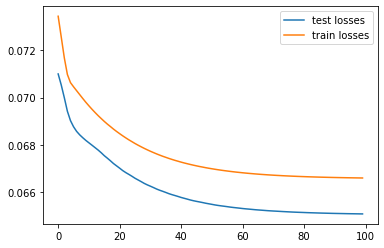

hayes-roth


100%|██████████| 32/32 [00:00<00:00, 4921.99it/s]


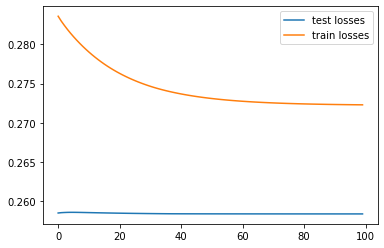

100%|██████████| 32/32 [00:00<00:00, 3887.89it/s]


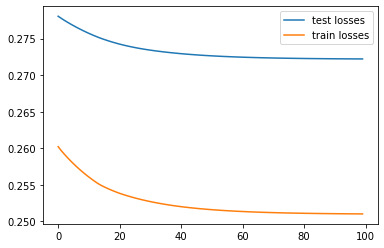

100%|██████████| 32/32 [00:00<00:00, 4949.94it/s]


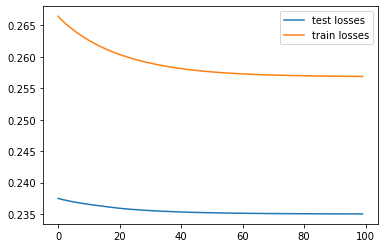

100%|██████████| 32/32 [00:00<00:00, 5082.85it/s]


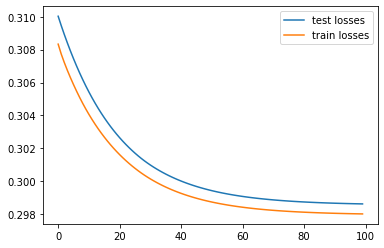

100%|██████████| 32/32 [00:00<00:00, 4574.88it/s]


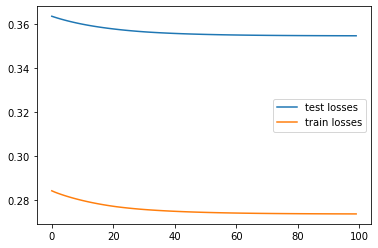

new_ecoli


100%|██████████| 68/68 [00:00<00:00, 5020.73it/s]


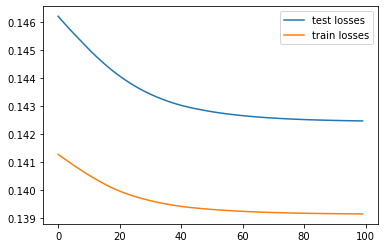

100%|██████████| 67/67 [00:00<00:00, 5357.32it/s]


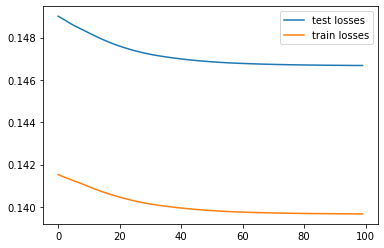

100%|██████████| 67/67 [00:00<00:00, 5191.45it/s]


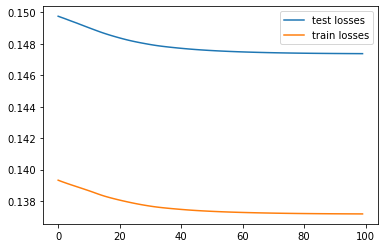

100%|██████████| 67/67 [00:00<00:00, 5020.61it/s]


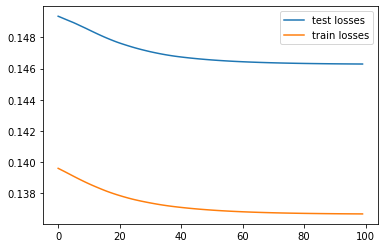

100%|██████████| 67/67 [00:00<00:00, 5147.33it/s]


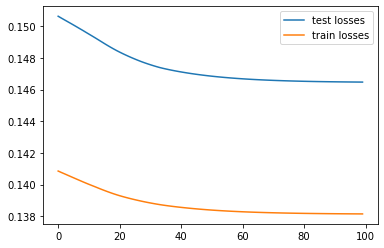

new_led7digit


100%|██████████| 100/100 [00:00<00:00, 4929.66it/s]


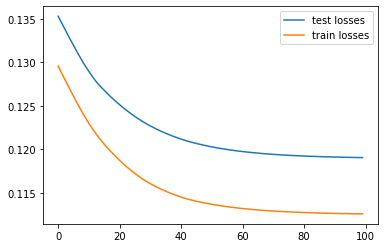

100%|██████████| 100/100 [00:00<00:00, 4568.76it/s]


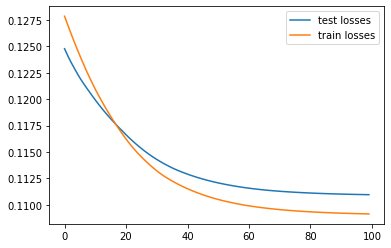

100%|██████████| 100/100 [00:00<00:00, 4360.03it/s]


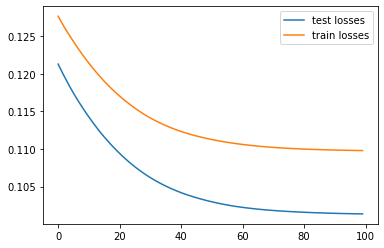

100%|██████████| 100/100 [00:00<00:00, 4379.51it/s]


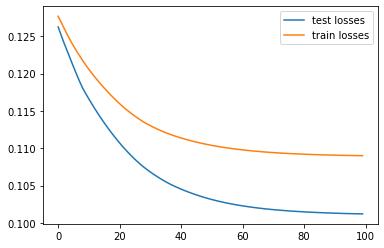

100%|██████████| 100/100 [00:00<00:00, 5253.39it/s]


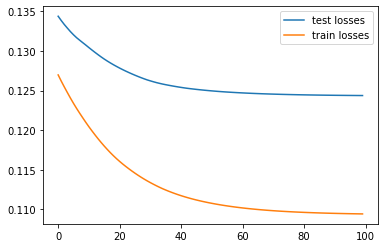

new_vehicle


100%|██████████| 170/170 [00:00<00:00, 5165.62it/s]


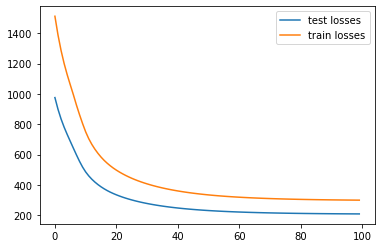

100%|██████████| 169/169 [00:00<00:00, 5133.12it/s]


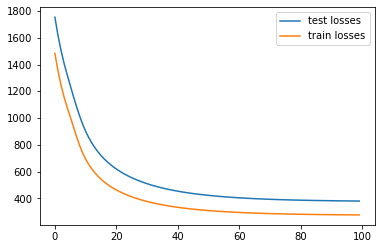

100%|██████████| 169/169 [00:00<00:00, 4184.65it/s]


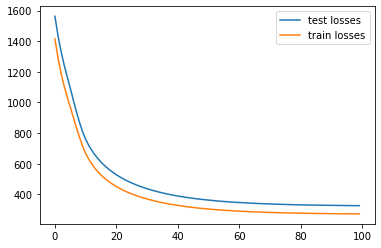

100%|██████████| 169/169 [00:00<00:00, 4657.98it/s]


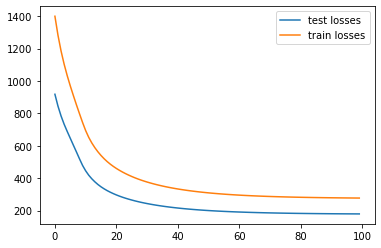

100%|██████████| 169/169 [00:00<00:00, 5269.15it/s]


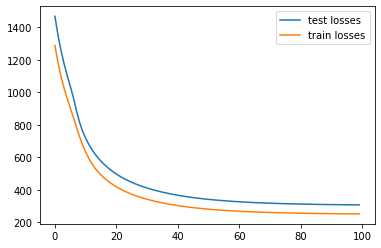

new_winequality-red


100%|██████████| 320/320 [00:00<00:00, 4889.84it/s]


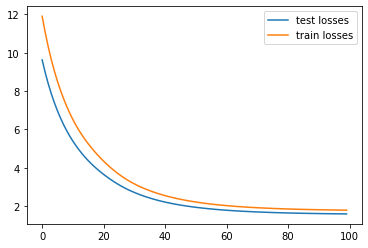

100%|██████████| 320/320 [00:00<00:00, 5403.36it/s]


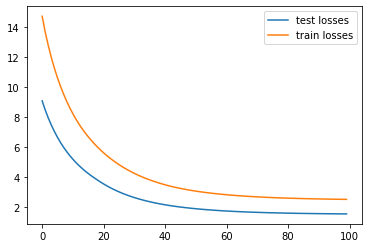

100%|██████████| 320/320 [00:00<00:00, 4705.38it/s]


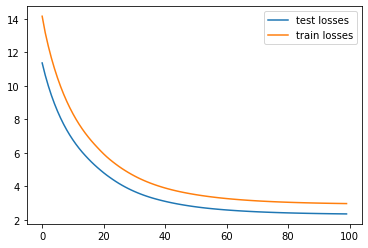

100%|██████████| 320/320 [00:00<00:00, 4841.44it/s]


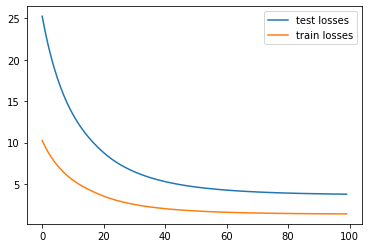

100%|██████████| 319/319 [00:00<00:00, 5332.46it/s]


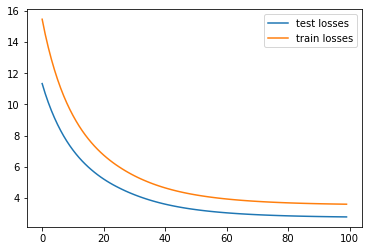

new_yeast


100%|██████████| 297/297 [00:00<00:00, 4938.04it/s]


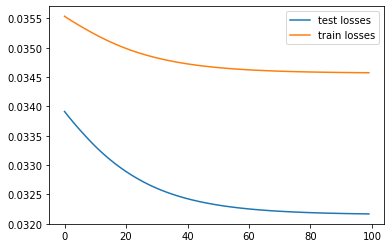

100%|██████████| 297/297 [00:00<00:00, 4665.75it/s]


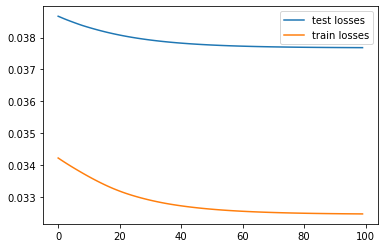

100%|██████████| 297/297 [00:00<00:00, 5071.46it/s]


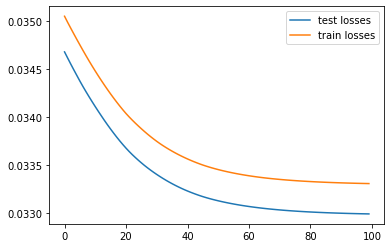

100%|██████████| 297/297 [00:00<00:00, 4933.42it/s]


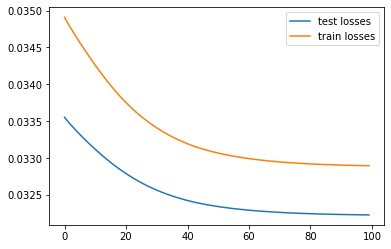

100%|██████████| 296/296 [00:00<00:00, 5268.09it/s]


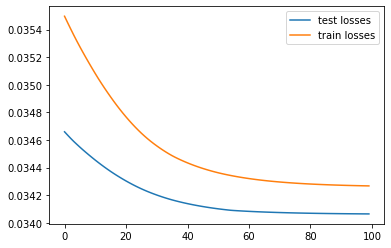

thyroid-newthyroid


100%|██████████| 43/43 [00:00<00:00, 4824.65it/s]


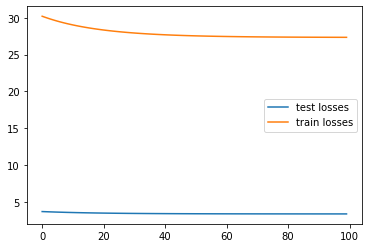

100%|██████████| 43/43 [00:00<00:00, 4103.27it/s]


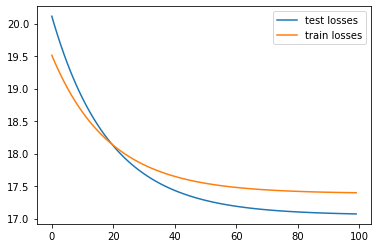

100%|██████████| 43/43 [00:00<00:00, 4675.20it/s]


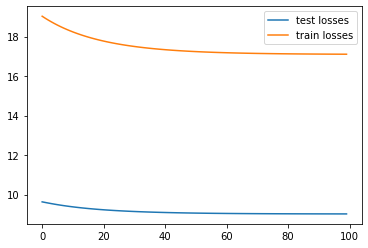

100%|██████████| 43/43 [00:00<00:00, 5080.42it/s]


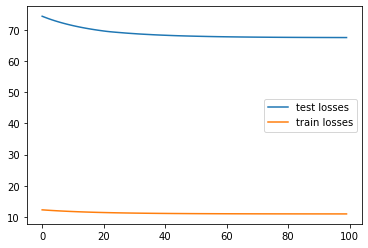

100%|██████████| 43/43 [00:00<00:00, 5068.29it/s]


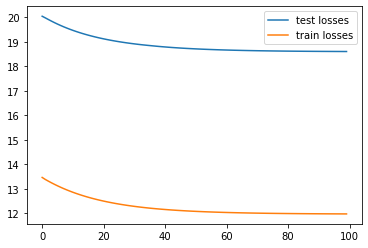

In [10]:
result_dict = defaultdict(list)

# for dataset_name in ['glass']:
for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    fold_result_dict = defaultdict(list)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train, y_train, X_test, y_test, weights,cfg)
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
            
            #f1, gmean
    # mean over folds
    # wiersze: datasety, 
    # kolumny -> klasyfikatory (przed dodaniem cech, po dodaniu, na samych nowych cechach)

In [11]:
results_df = pd.DataFrame.from_dict(result_dict)

In [12]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features
0,1czysty-cut,0.928593,0.934765,0.935490,0.936512,0.959928,0.956608,0.951799,0.951434,0.957168,0.964899,0.955359,0.961317
1,2delikatne-cut,0.757241,0.746203,0.721450,0.733821,0.765730,0.761663,0.730617,0.743669,0.763861,0.769020,0.751226,0.764499
2,3mocniej-cut,0.566813,0.522185,0.510395,0.505998,0.553547,0.497383,0.525950,0.514958,0.545038,0.488811,0.513191,0.501017
3,4delikatne-bezover-cut,0.815342,0.831648,0.797895,0.816954,0.815985,0.827471,0.799431,0.812144,0.819428,0.828619,0.805218,0.815066
4,balance-scale,0.586919,0.092880,0.565339,0.171120,0.585261,0.093853,0.545821,0.291602,0.579155,0.158946,0.550273,0.410451
5,cleveland,0.316984,0.096811,0.325690,0.183910,0.264884,0.060897,0.232017,0.060895,0.245641,0.064882,0.228431,0.075029
6,cleveland_v2,0.320120,0.055699,0.335967,0.155365,0.337022,0.077201,0.312143,0.080619,0.299970,0.060665,0.269908,0.065534
7,cmc,0.522460,0.520194,0.470766,0.473769,0.524261,0.512620,0.436445,0.438303,0.513837,0.496368,0.430842,0.424518
8,dermatology,0.969314,0.964939,0.947284,0.948507,0.959312,0.954627,0.953780,0.957176,0.907123,0.899897,0.818960,0.803949
9,glass,0.724524,0.480106,0.652585,0.453906,0.730670,0.546542,0.565202,0.467914,0.646635,0.503160,0.549628,0.463320


In [13]:
results_df.filter(regex=("dataset|RF24-f1*"))

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,1czysty-cut,0.928593,0.959928,0.957168
1,2delikatne-cut,0.757241,0.765730,0.763861
2,3mocniej-cut,0.566813,0.553547,0.545038
3,4delikatne-bezover-cut,0.815342,0.815985,0.819428
4,balance-scale,0.586919,0.585261,0.579155
5,cleveland,0.316984,0.264884,0.245641
6,cleveland_v2,0.320120,0.337022,0.299970
7,cmc,0.522460,0.524261,0.513837
8,dermatology,0.969314,0.959312,0.907123
9,glass,0.724524,0.730670,0.646635


In [14]:
results_df.filter(regex=("dataset|RF24-gmean*"))

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,1czysty-cut,0.934765,0.956608,0.964899
1,2delikatne-cut,0.746203,0.761663,0.769020
2,3mocniej-cut,0.522185,0.497383,0.488811
3,4delikatne-bezover-cut,0.831648,0.827471,0.828619
4,balance-scale,0.092880,0.093853,0.158946
5,cleveland,0.096811,0.060897,0.064882
6,cleveland_v2,0.055699,0.077201,0.060665
7,cmc,0.520194,0.512620,0.496368
8,dermatology,0.964939,0.954627,0.899897
9,glass,0.480106,0.546542,0.503160


In [15]:
results_df.filter(regex=("dataset|DT-f1*"))

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,1czysty-cut,0.935490,0.951799,0.955359
1,2delikatne-cut,0.721450,0.730617,0.751226
2,3mocniej-cut,0.510395,0.525950,0.513191
3,4delikatne-bezover-cut,0.797895,0.799431,0.805218
4,balance-scale,0.565339,0.545821,0.550273
5,cleveland,0.325690,0.232017,0.228431
6,cleveland_v2,0.335967,0.312143,0.269908
7,cmc,0.470766,0.436445,0.430842
8,dermatology,0.947284,0.953780,0.818960
9,glass,0.652585,0.565202,0.549628


In [16]:
results_df.filter(regex=("dataset|DT-gmean*"))

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,1czysty-cut,0.936512,0.951434,0.961317
1,2delikatne-cut,0.733821,0.743669,0.764499
2,3mocniej-cut,0.505998,0.514958,0.501017
3,4delikatne-bezover-cut,0.816954,0.812144,0.815066
4,balance-scale,0.171120,0.291602,0.410451
5,cleveland,0.183910,0.060895,0.075029
6,cleveland_v2,0.155365,0.080619,0.065534
7,cmc,0.473769,0.438303,0.424518
8,dermatology,0.948507,0.957176,0.803949
9,glass,0.453906,0.467914,0.463320
